## Dataset - Pima Indians Diabetes Database
### Contributors 
### 1. Pardeep Soni

---

### About dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Attribute Information
1) Pregnancies: To express the Number of pregnancies <br>
2) Glucose: To express the Glucose level in blood <br>
3) BloodPressure: To express the Blood pressure measurement <br>
4) SkinThickness: To express the thickness of the skin <br>
5) Insulin: To express the Insulin level in blood <br>
6) BMI: To express the Body mass index <br>
7) DiabetesPedigreeFunction: To express the Diabetes percentage <br>
8) Age: To express the age <br>
9) Outcome: To express the final result 1 is YES o is NO <br>

### 1. Import Libraries/Dataset

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.ensemble import RandomForestClassifier   # For the Random Forest model
from sklearn.neighbors import KNeighborsClassifier   # For the K-Nearest Neighbors model
from sklearn.metrics import accuracy_score, classification_report

In [2]:
initial_df = pd.read_csv("diabetes.csv")

In [3]:
initial_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 2. Data Visualization and Exploration

### a) Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [4]:
# Print the first 2 rows of the dataset for a sanity check
initial_df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
# Check if the 'Outcome' column matches the target variable
target_values = initial_df['Outcome'].unique()
print("Unique values in 'Outcome' column:", target_values)

Unique values in 'Outcome' column: [1 0]


All 9 columns are present in dataframe and descriptions of these columns are written above

### b) Comment on class imbalance with appropriate visualization method.

Outcome
0    500
1    268
Name: count, dtype: int64


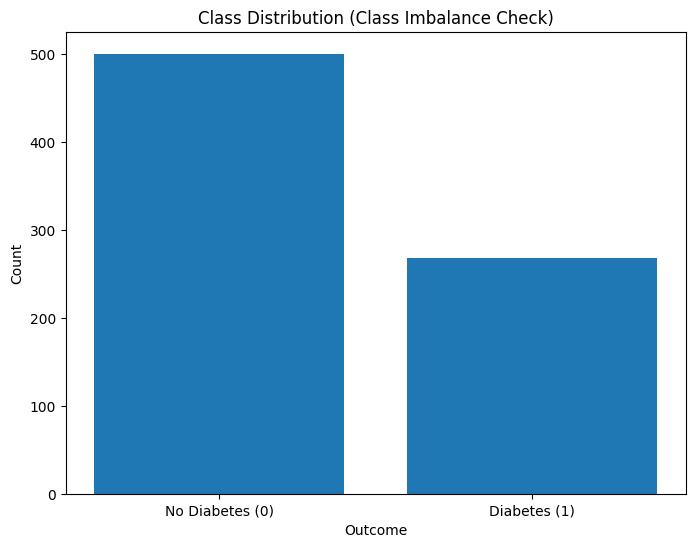

In [6]:
import matplotlib.pyplot as plt

# Count the number of samples in each class
class_counts = initial_df['Outcome'].value_counts()
print(class_counts)
# Create a bar chart to visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(class_counts.index, ['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Class Distribution (Class Imbalance Check)')
plt.show()

- Class 0 (No Diabetes) has 500 samples.
- Class 1 (Diabetes) has 268 samples.

This class distribution indicates that there is some class imbalance in the dataset. Class 0 (No Diabetes) has more than double the number of samples compared to Class 1 (Diabetes).

**Insights:**

1. **Class Imbalance:** The class distribution clearly shows an imbalance in the dataset. This is important to note because imbalanced datasets can potentially lead to biased model predictions. In this case, having significantly more samples of one class (No Diabetes) than the other (Diabetes) could affect the model's ability to accurately predict the minority class (Diabetes).

2. **Impact on Model Training:** When building a machine learning model, it may be more challenging for the model to learn patterns in the minority class due to the smaller number of samples. The model might become biased towards the majority class and perform poorly on the minority class.

3. **Handling Class Imbalance:** To address class imbalance, you can consider techniques such as:
   - Resampling the dataset: You can oversample the minority class or undersample the majority class to balance the class distribution.

### c) Provide appropriate visualizations to get an insight about the dataset.

**Histograms for Numeric Features:** Visualize the distributions of numeric features to understand their characteristics.

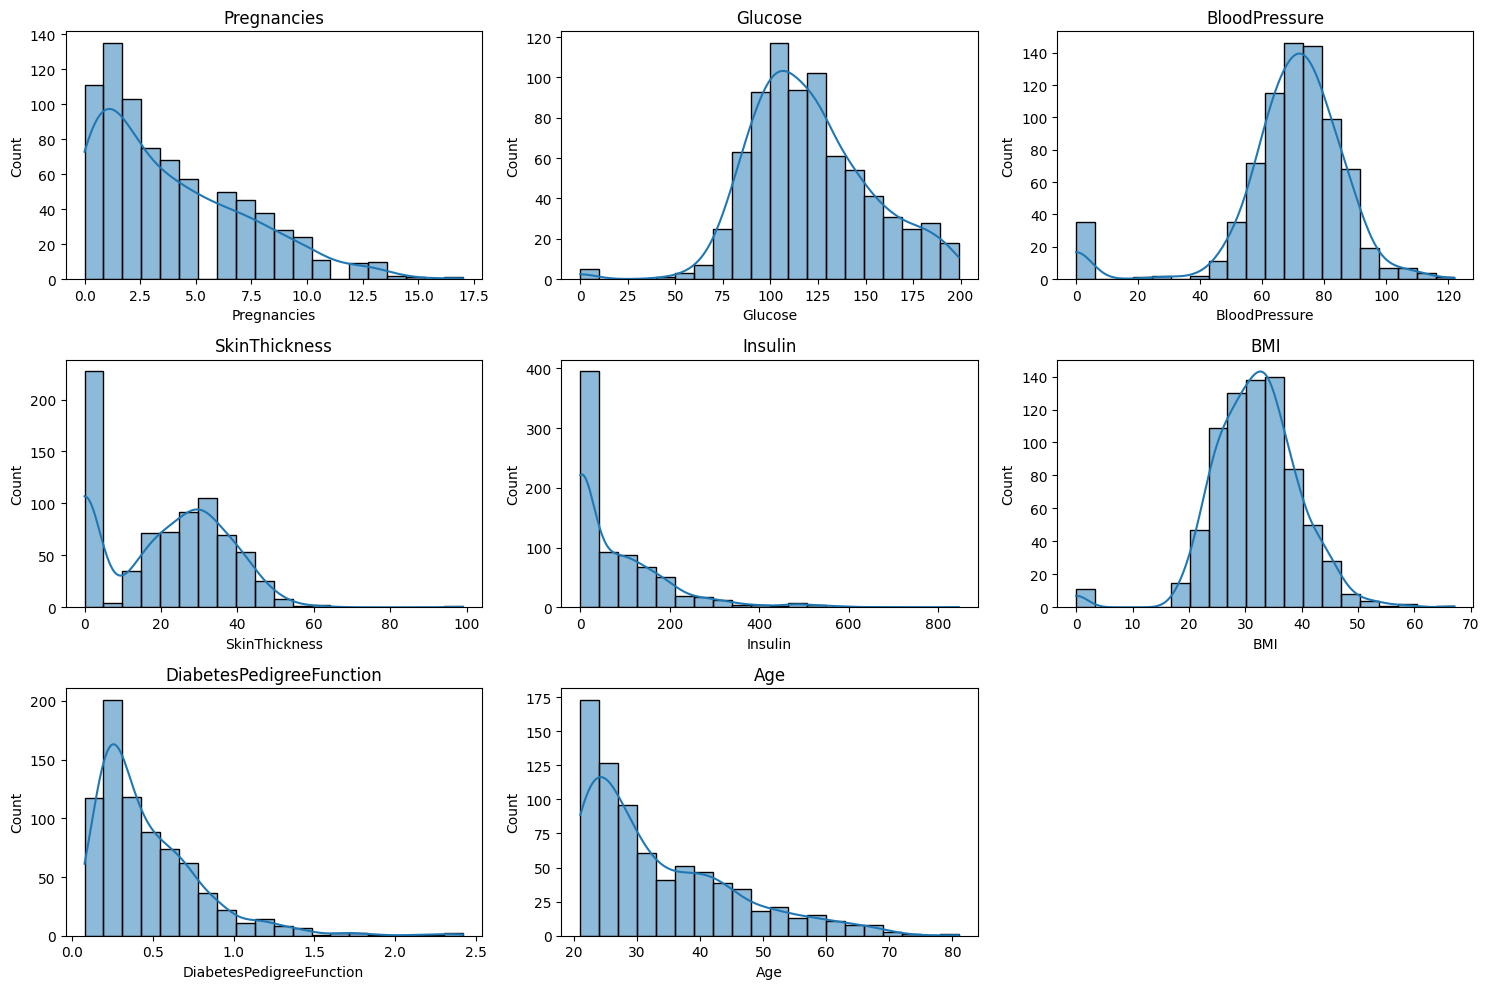

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot histograms for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(initial_df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


- positively skewed columns are: Pregnencies, Insuline, DiabetesPedigreeFunction, Age
- Normally distributed columns are: Glucose, BloodPressure, BMI, SkinThickness (Mostly normally disctributed if we remove 0)

**Box Plots:** Create box plots to identify potential outliers in the data.

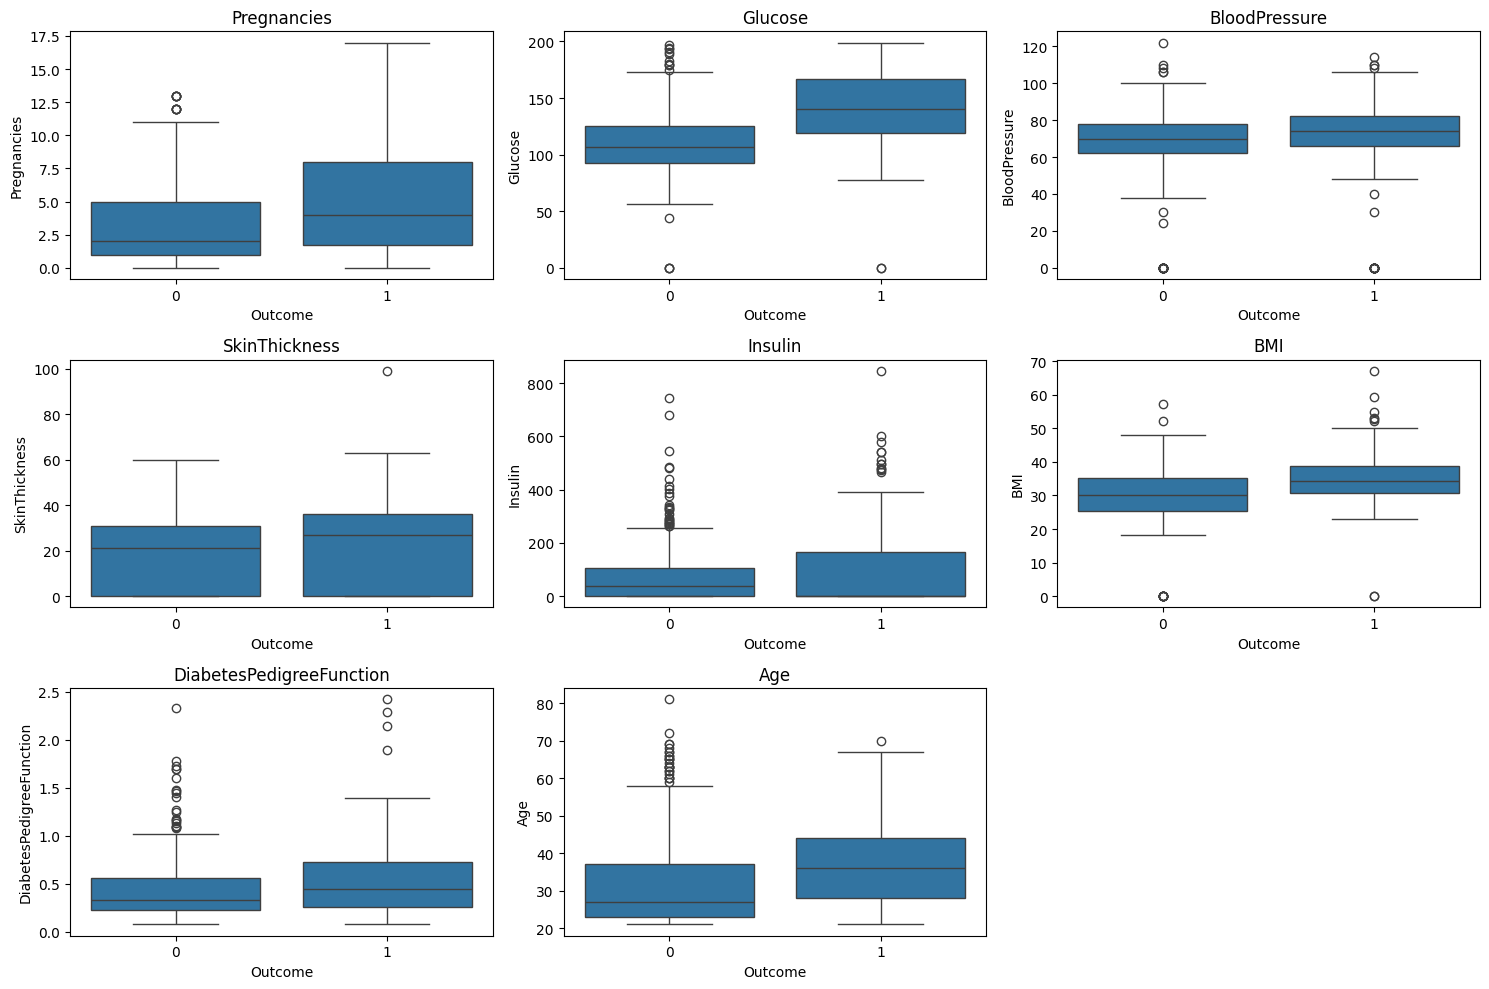

In [8]:
# Plot box plots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=col, data=initial_df)
    plt.title(col)
plt.tight_layout()
plt.show()


- Most of the columns have outliers and we are going to handle these using Z-score cutt-off method.

**Count Plot for Target Variable:** Visualize the distribution of the target variable ('Outcome').

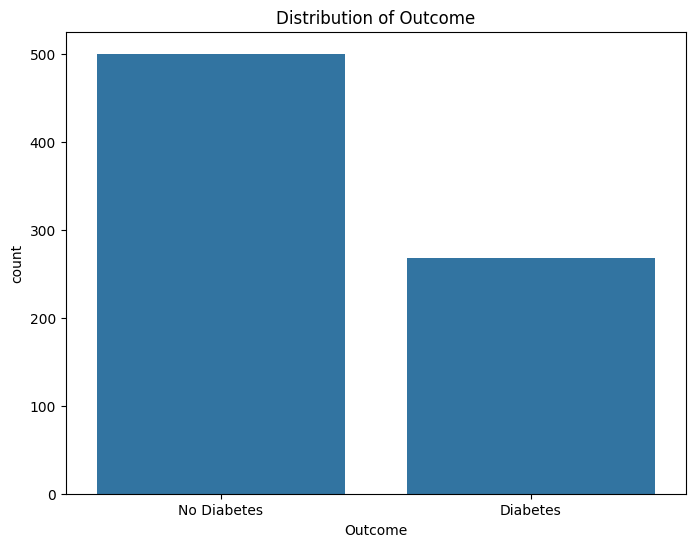

In [9]:
# Plot count plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=initial_df)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Distribution of Outcome')
plt.show()

**Pair Plot:** Use pair plots to visualize pairwise relationships between numeric features.

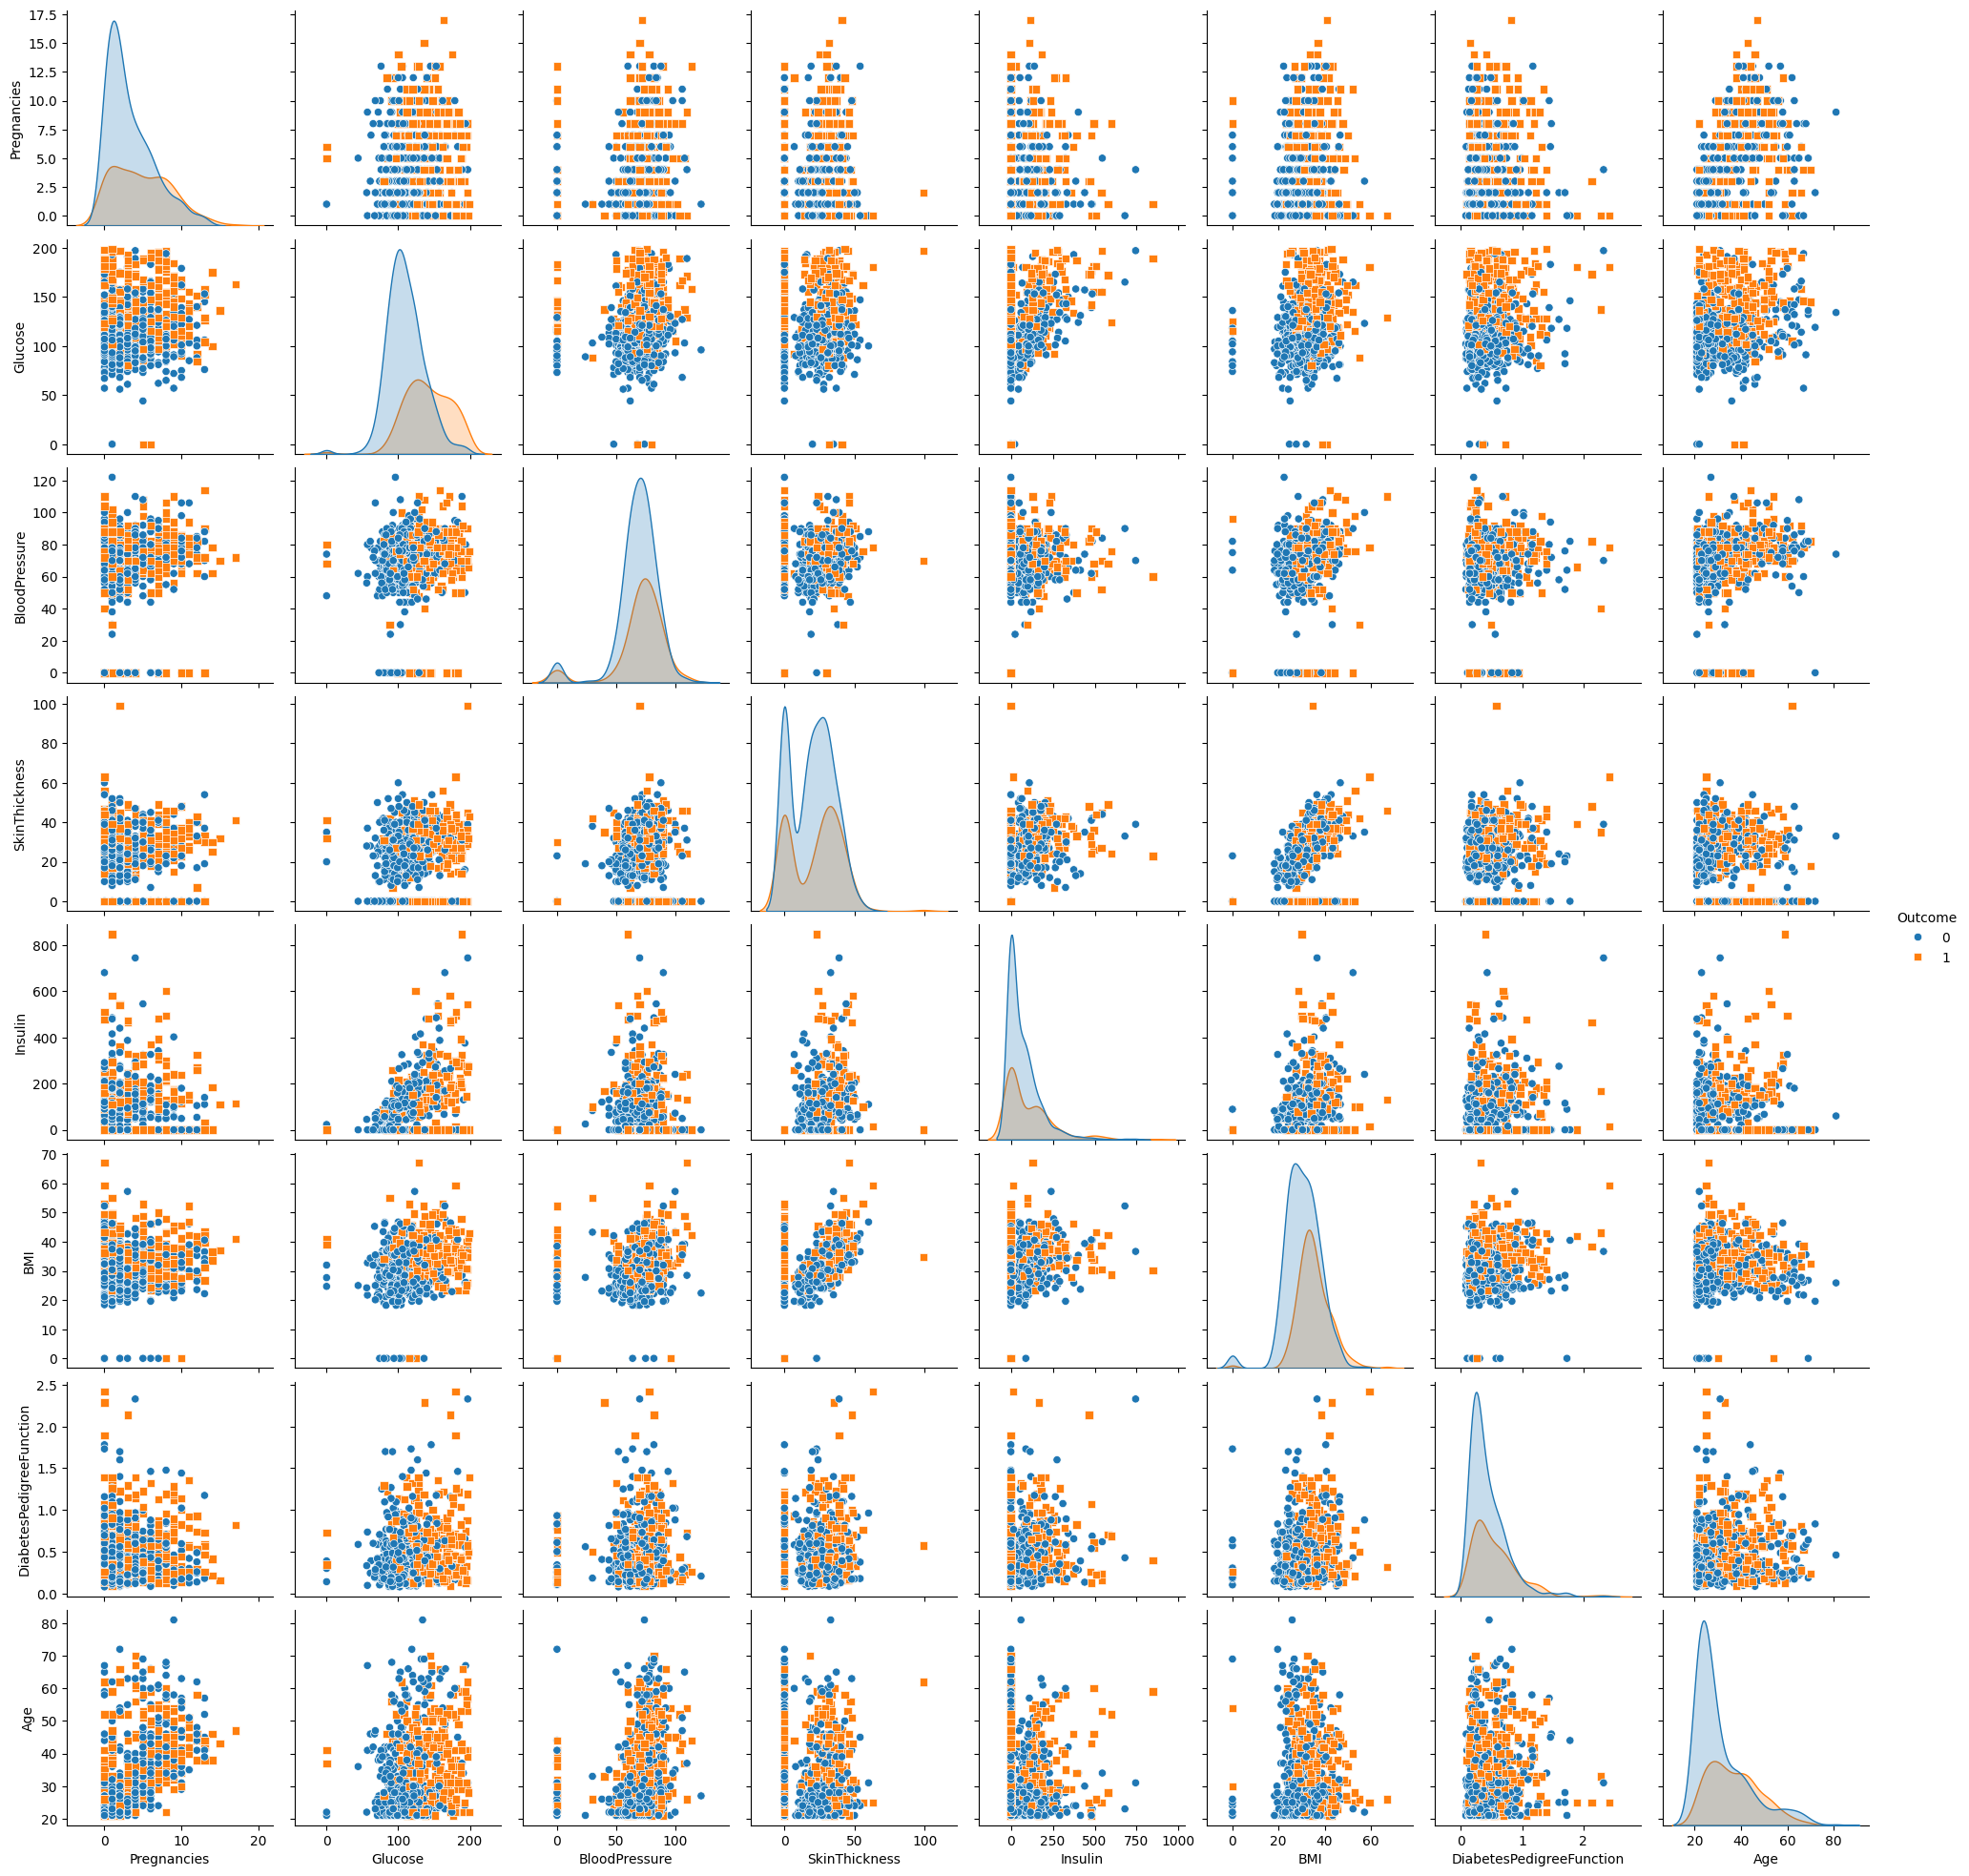

In [10]:
# Plot pair plot for numeric features
sns.pairplot(initial_df[numeric_cols + ['Outcome']], hue='Outcome', markers=["o", "s"], diag_kind='kde')
plt.show()

These visualizations provide insights into the distributions of individual features, relationships between features, and the distribution of the target variable.

### d) Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks.

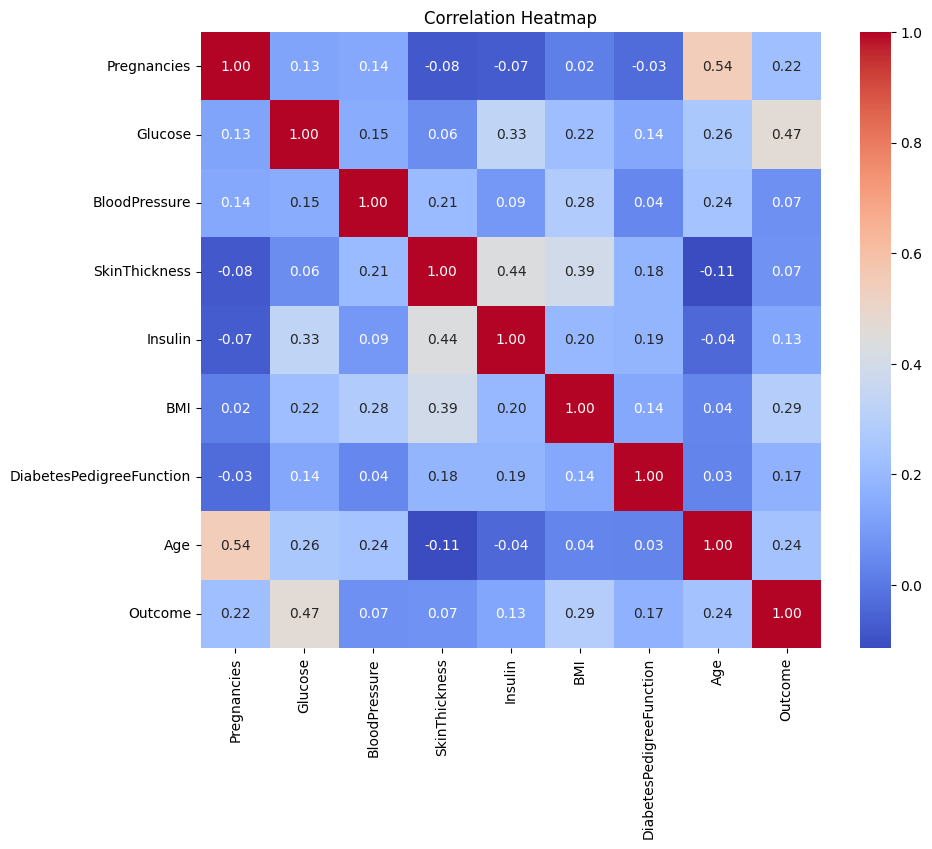

In [11]:
# Calculate the correlation matrix
correlation_matrix = initial_df.corr()

# Create a heatmap to visualize correlations
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Justification for the effect of correlational analysis on feature selection:**

**High Correlation Between Features:** If you observe high positive or negative correlations between pairs of features, it suggests that those features may provide redundant or very similar information to the model. In such cases, retaining all correlated features might not be necessary and could lead to multicollinearity, which can negatively impact model interpretability and generalization.

**Impact on Feature Selection:** Correlational analysis can have a significant impact on feature selection decisions. Here's how:

**Positive Correlation with Target:** Features that have a strong positive correlation with the target variable ('Outcome' in this case) are likely to be important predictors. Including such features in the model can improve its predictive power.

**High Inter-Feature Correlation:** When two or more features have a high correlation among themselves, you may consider removing one of them to reduce multicollinearity and model complexity.

**Low Correlation with Target:** Features with very low correlation with the target variable may not contribute much to the predictive power of the model. You might decide to exclude such features during feature selection to simplify the model.

**Justification for Feature Selection:** In the context of this specific dataset, the correlational analysis is important for feature selection. Here's why:

If certain features are highly correlated with each other (e.g., 'Glucose' and 'BMI' or 'Age' and 'Pregnancies'), you might choose to retain only one from each highly correlated pair.

If certain features have a strong correlation with the target variable ('Outcome'), it's essential to include them in your model to improve its predictive capability.

By conducting correlational analysis, you can make informed decisions about which features to include or exclude during feature selection, ultimately leading to a more effective and interpretable model.

## 2. Data Pre-processing and cleaning
### a) Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.

In [12]:
# Check for missing values
missing_values = initial_df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### There is no missing values in dataset

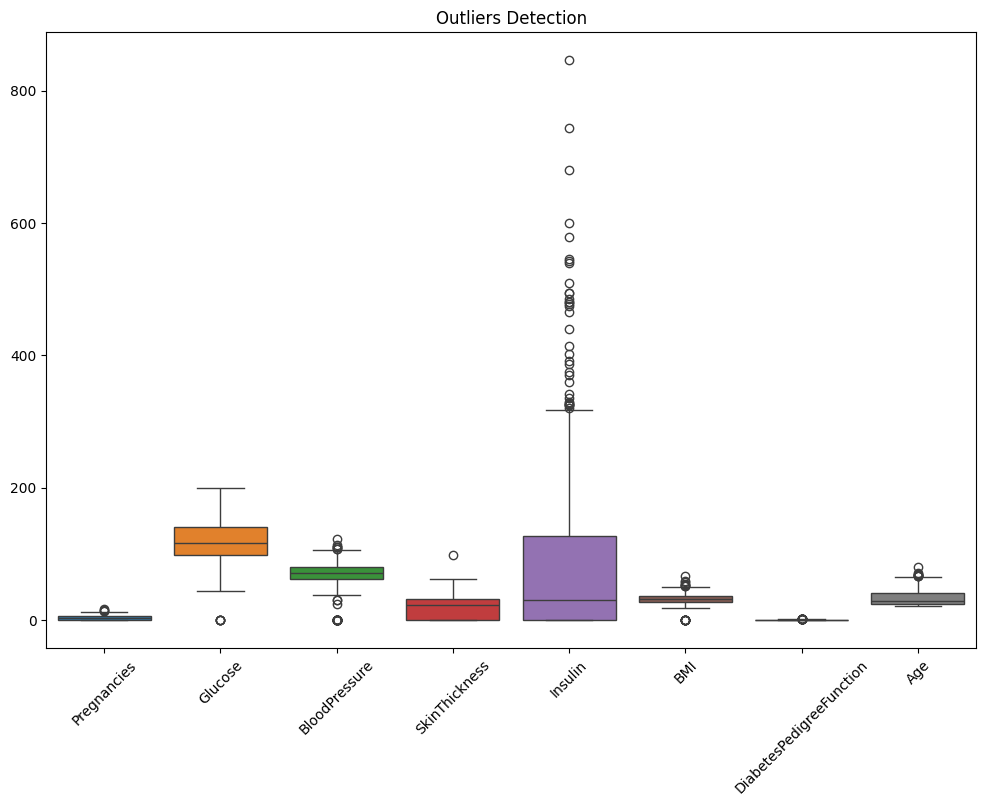

In [13]:
# Visualize outliers using box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=initial_df.drop('Outcome', axis=1))
plt.title('Outliers Detection')
plt.xticks(rotation=45)
plt.show()

C:\Users\parde\AppData\Local\Temp\ipykernel_4712\351248054.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  initial_df.loc[z_scores > z_score_threshold, feature] = initial_df[feature].median()


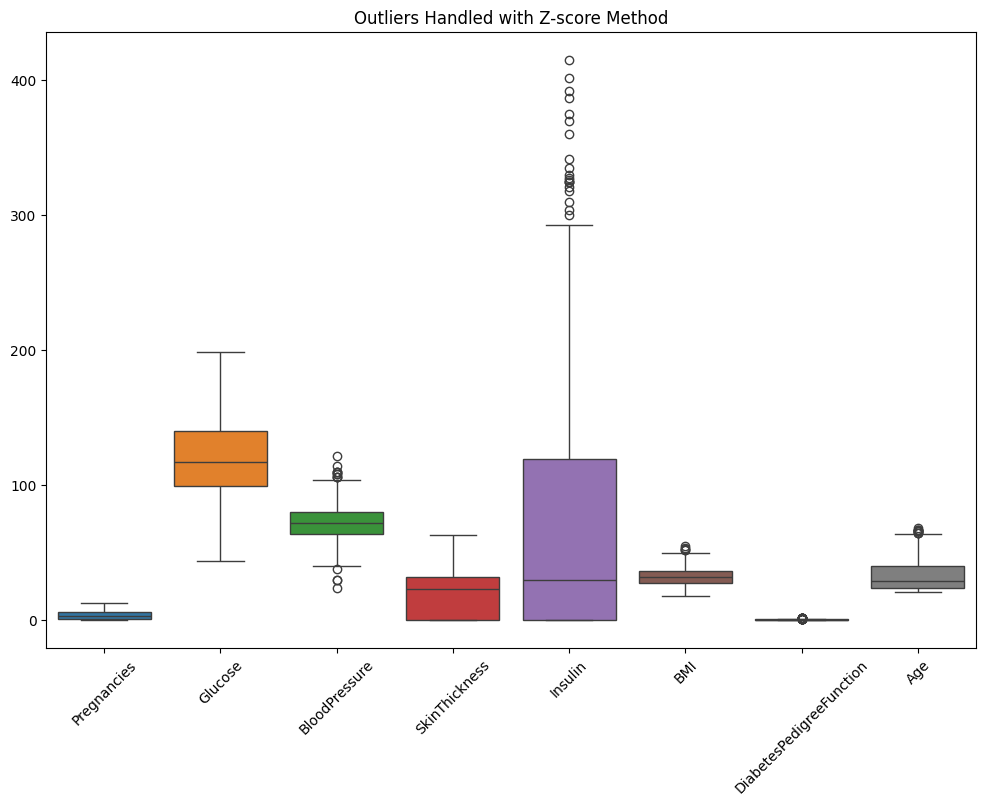

In [14]:
from scipy import stats

# Define the z-score threshold for identifying outliers (e.g., 3 standard deviations)
z_score_threshold = 3

# Apply Z-score to numeric features to identify and handle outliers
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in numeric_features:
    z_scores = np.abs(stats.zscore(initial_df[feature]))
    outliers = initial_df[z_scores > z_score_threshold]
    
    # Replace outliers with the median value of the feature
    initial_df.loc[z_scores > z_score_threshold, feature] = initial_df[feature].median()

# Visualize box plots after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=initial_df.drop('Outcome', axis=1))
plt.title('Outliers Handled with Z-score Method')
plt.xticks(rotation=45)
plt.show()


### b) Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.

#### 3. **Oversampling**:
   - **Justification**: Class imbalance can negatively impact model performance. Over-sampling Technique generates synthetic samples for the minority class, balancing the dataset. It helps prevent the model from being biased towards the majority class.

In [15]:
from sklearn.utils import resample

# Separate the minority and majority classes
minority_class = initial_df[initial_df['Outcome'] == 1]
majority_class = initial_df[initial_df['Outcome'] == 0]

# Perform random oversampling on the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class with the upsampled minority class
oversampled_data = pd.concat([majority_class, minority_upsampled])

In [16]:
oversampled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0.0,26.6,0.351,31,0
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,0,0.0,25.6,0.201,30,0
7,10,115,72,0,0.0,35.3,0.134,29,0
10,4,110,92,0,0.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
612,7,168,88,42,321.0,38.2,0.787,40,1
586,8,143,66,0,0.0,34.9,0.129,41,1
730,3,130,78,23,79.0,28.4,0.323,34,1
664,6,115,60,39,0.0,33.7,0.245,40,1


#### 1. **Standardization**:
   - **Justification**: Standardization rescales features to have a mean of 0 and a standard deviation of 1. It is suitable when features have different units and scales. Standardized features help algorithms that rely on distance calculations, such as K-Nearest Neighbors and Support Vector Machines.

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the features
X_standardized = scaler.fit_transform(oversampled_data)

In [18]:
import pickle
# Save the StandardScaler
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#### 2. **Normalization**:
   - **Justification**: Normalization scales features to a specific range, typically [0, 1]. It is useful when you want to bring all features to the same scale, especially for algorithms sensitive to feature magnitudes, like neural networks.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
min_max_scaler = MinMaxScaler()

# Normalize the features
X_normalized = min_max_scaler.fit_transform(oversampled_data)

In [20]:
with open('min_max_scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)

## Model Building
#### Train Test Split

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_standardized is a NumPy array
X_standardized_df = pd.DataFrame(X_standardized, columns=oversampled_data.columns)  

# Define your target (y)
y = X_standardized_df['Outcome']

# Drop the 'Outcome' column from X_standardized_df to get the feature matrix
X = X_standardized_df.drop('Outcome', axis=1)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print("target variable counts in traning set\n",y_train.value_counts())
print("target variable counts in testing set\n",y_test.value_counts())

target variable counts in traning set
 Outcome
-1.0    404
 1.0    396
Name: count, dtype: int64
target variable counts in testing set
 Outcome
 1.0    104
-1.0     96
Name: count, dtype: int64


#### b. Build a Random Forest classification model:
 i) Tune hyperparameters using cross-validation and justify your answer:

To tune the hyperparameters of the Random Forest classifier, we will perform a grid search with cross-validation. The hyperparameters we will tune are the number of trees (n_estimators) and the maximum depth of the trees (max_depth).

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation (5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [24]:
# Save the best model
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Save feature names (optional, useful for prediction)
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

**Justification:**

- We chose to tune the number of trees (n_estimators) because it can impact model complexity and overfitting. We experimented with values 50, 100, and 150 to find a balance between underfitting and overfitting.
- We tuned the maximum depth of the trees (max_depth) to control tree depth and prevent overfitting. We tested values of None (unlimited depth), 10, 20, and 30 to explore different levels of tree complexity.

ii. **Evaluate the model's performance using appropriate metrics:**

We will evaluate the Random Forest model's performance using common classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
rf_predictions = grid_search.predict(X_test)

# Evaluate the model
rf_accuracy = grid_search.score(X_test, y_test)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("rf_accuracy",rf_accuracy,"rf_classification_report",rf_classification_report,"rf_confusion_matrix",rf_confusion_matrix,"rf_roc_auc",rf_roc_auc)

rf_accuracy 0.87 rf_classification_report               precision    recall  f1-score   support

        -1.0       0.86      0.88      0.87        96
         1.0       0.88      0.87      0.87       104

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200
 rf_confusion_matrix [[84 12]
 [14 90]] rf_roc_auc 0.9475160256410257


In [26]:
# Define the metrics as dictionaries
rf_metrics = {
    "Metric": ["Accuracy", "Confusion Matrix", "ROC AUC"],
    "Value": [rf_accuracy, rf_confusion_matrix, rf_roc_auc]
}

# Create a DataFrame
rf_metrics_df = pd.DataFrame(rf_metrics)

# Display the DataFrame
rf_metrics_df

,Metric,Value
0,Accuracy,0.87
1,Confusion Matrix,"[[84, 12], [14, 90]]"
2,ROC AUC,0.947516


#### c. Build a KNN classification model:
i. **Determine the optimal value of k through hyperparameter tuning and cross-validation, and justify your answer:**

We will determine the optimal value of 'k' for the K-Nearest Neighbors (KNN) classifier using cross-validation. The range of 'k' values we'll test will help us find the best 'k' for our dataset.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score  # Import cross_val_score

# Define a range of 'k' values to test
k_values = [3, 5, 7, 9, 11]

# Create a dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each 'k' value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[k] = np.mean(scores)

# Find the 'k' value with the highest accuracy
best_k = max(cv_results, key=cv_results.get)


**Justification:**

- We tested a range of 'k' values, including 3, 5, 7, 9, and 11, to explore different levels of neighborhood influence on the predictions.
- Cross-validation helps identify the 'k' value that provides the best balance between bias and variance. In our case, we selected the 'k' value that maximized the mean accuracy across folds.

ii. **Evaluate the KNN model's performance using appropriate metrics:**

We will evaluate the KNN model's performance using common classification metrics, including accuracy, precision, recall, F1-score, and ROC-AUC.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Create a KNN classifier with the best 'k' value
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model
knn_accuracy = knn_classifier.score(X_test, y_test)
knn_classification_report = classification_report(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1])
print("knn_accuracy",knn_accuracy,"knn_classification_report",knn_classification_report,"knn_confusion_matrix",knn_confusion_matrix,"knn_roc_auc",knn_roc_auc)

knn_accuracy 0.805 knn_classification_report               precision    recall  f1-score   support

        -1.0       0.82      0.76      0.79        96
         1.0       0.79      0.85      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200
 knn_confusion_matrix [[73 23]
 [16 88]] knn_roc_auc 0.8371394230769231


In [29]:
# Define the metrics as dictionaries
knn_metrics = {
    "Metric": ["Accuracy", "Confusion Matrix", "ROC AUC"],
    "Value": [knn_accuracy, knn_confusion_matrix, knn_roc_auc]
}

# Create a DataFrame
knn_metrics_df = pd.DataFrame(knn_metrics)

# Display the DataFrame
knn_metrics_df

,Metric,Value
0,Accuracy,0.805
1,Confusion Matrix,"[[73, 23], [16, 88]]"
2,ROC AUC,0.837139


In [30]:
print("confusion metrices for random forest\n",rf_confusion_matrix)
print("confusion metrices for knn\n",knn_confusion_matrix)

confusion metrices for random forest
 [[84 12]
 [14 90]]
confusion metrices for knn
 [[73 23]
 [16 88]]


### Type 2 error is false negative and according to the confusion metrices random forest model is giving the lowest false negatives, so we can choose that model as our champion model

Let's break down the metrics and provide insights:

- **True Positives (TP)**: For the Random Forest, there are 90 true positives, while for KNN, there are 88 true positives. Both models perform reasonably well in correctly identifying diabetic cases.

- **True Negatives (TN)**: For the Random Forest, there are 84 true negatives, while for KNN, there are 73 true negatives. The Random Forest outperforms KNN in correctly identifying non-diabetic cases.

- **False Positives (FP)**: For the Random Forest, there are 12 false positives, while for KNN, there are 23 false positives. The Random Forest makes fewer incorrect predictions of non-diabetic cases.

- **False Negatives (FN)**: For the Random Forest, there are 14 false negatives, while for KNN, there are 16 false negatives. Both models have a similar number of incorrect predictions of diabetic cases.

Now, let's consider the following evaluation metrics:

- **Accuracy**: The Random Forest has higher accuracy because it correctly classifies more cases overall.

- **Precision**: Precision measures how many of the predicted positive cases are correct. In this case, both models have relatively high precision.

- **Recall**: Recall measures how many of the actual positive cases are correctly predicted. Both models have similar recall values.

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. Both models have a similar F1-score.

- **ROC-AUC**: You haven't provided the ROC-AUC scores, but it's an important metric for evaluating the ability of a model to distinguish between classes. You can calculate and compare ROC-AUC scores to get additional insights.

Based on the provided confusion matrices and considering accuracy, precision, and recall, it appears that the Random Forest model performs slightly better overall. It achieves a higher accuracy and better performance in correctly identifying non-diabetic cases. However, the choice between the two models may also depend on other factors such as computational resources and the specific goals of your application.

--- end of assignment ---